In [1]:
#Importing the libraries
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Importing the dataset


In [2]:
dataset = pd.read_csv('bank.csv', sep = ',')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Inferences

- Data has benn read correctly

In [3]:
pwd()

'/Users/abhinandanchiney/Desktop/AIML/res_6/project1'

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
dataset.shape

(10000, 14)

In [6]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Inferences:

- There are no missing values in the dataset
- There are no apparent issues in the data set as seen from the above cells
- The TARGET variable in the data set is "Exited" as we want to build a model which will help the bank identify which customers will exit the bank and which will not

/Users/abhinandanchiney/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/abhinandanchiney/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


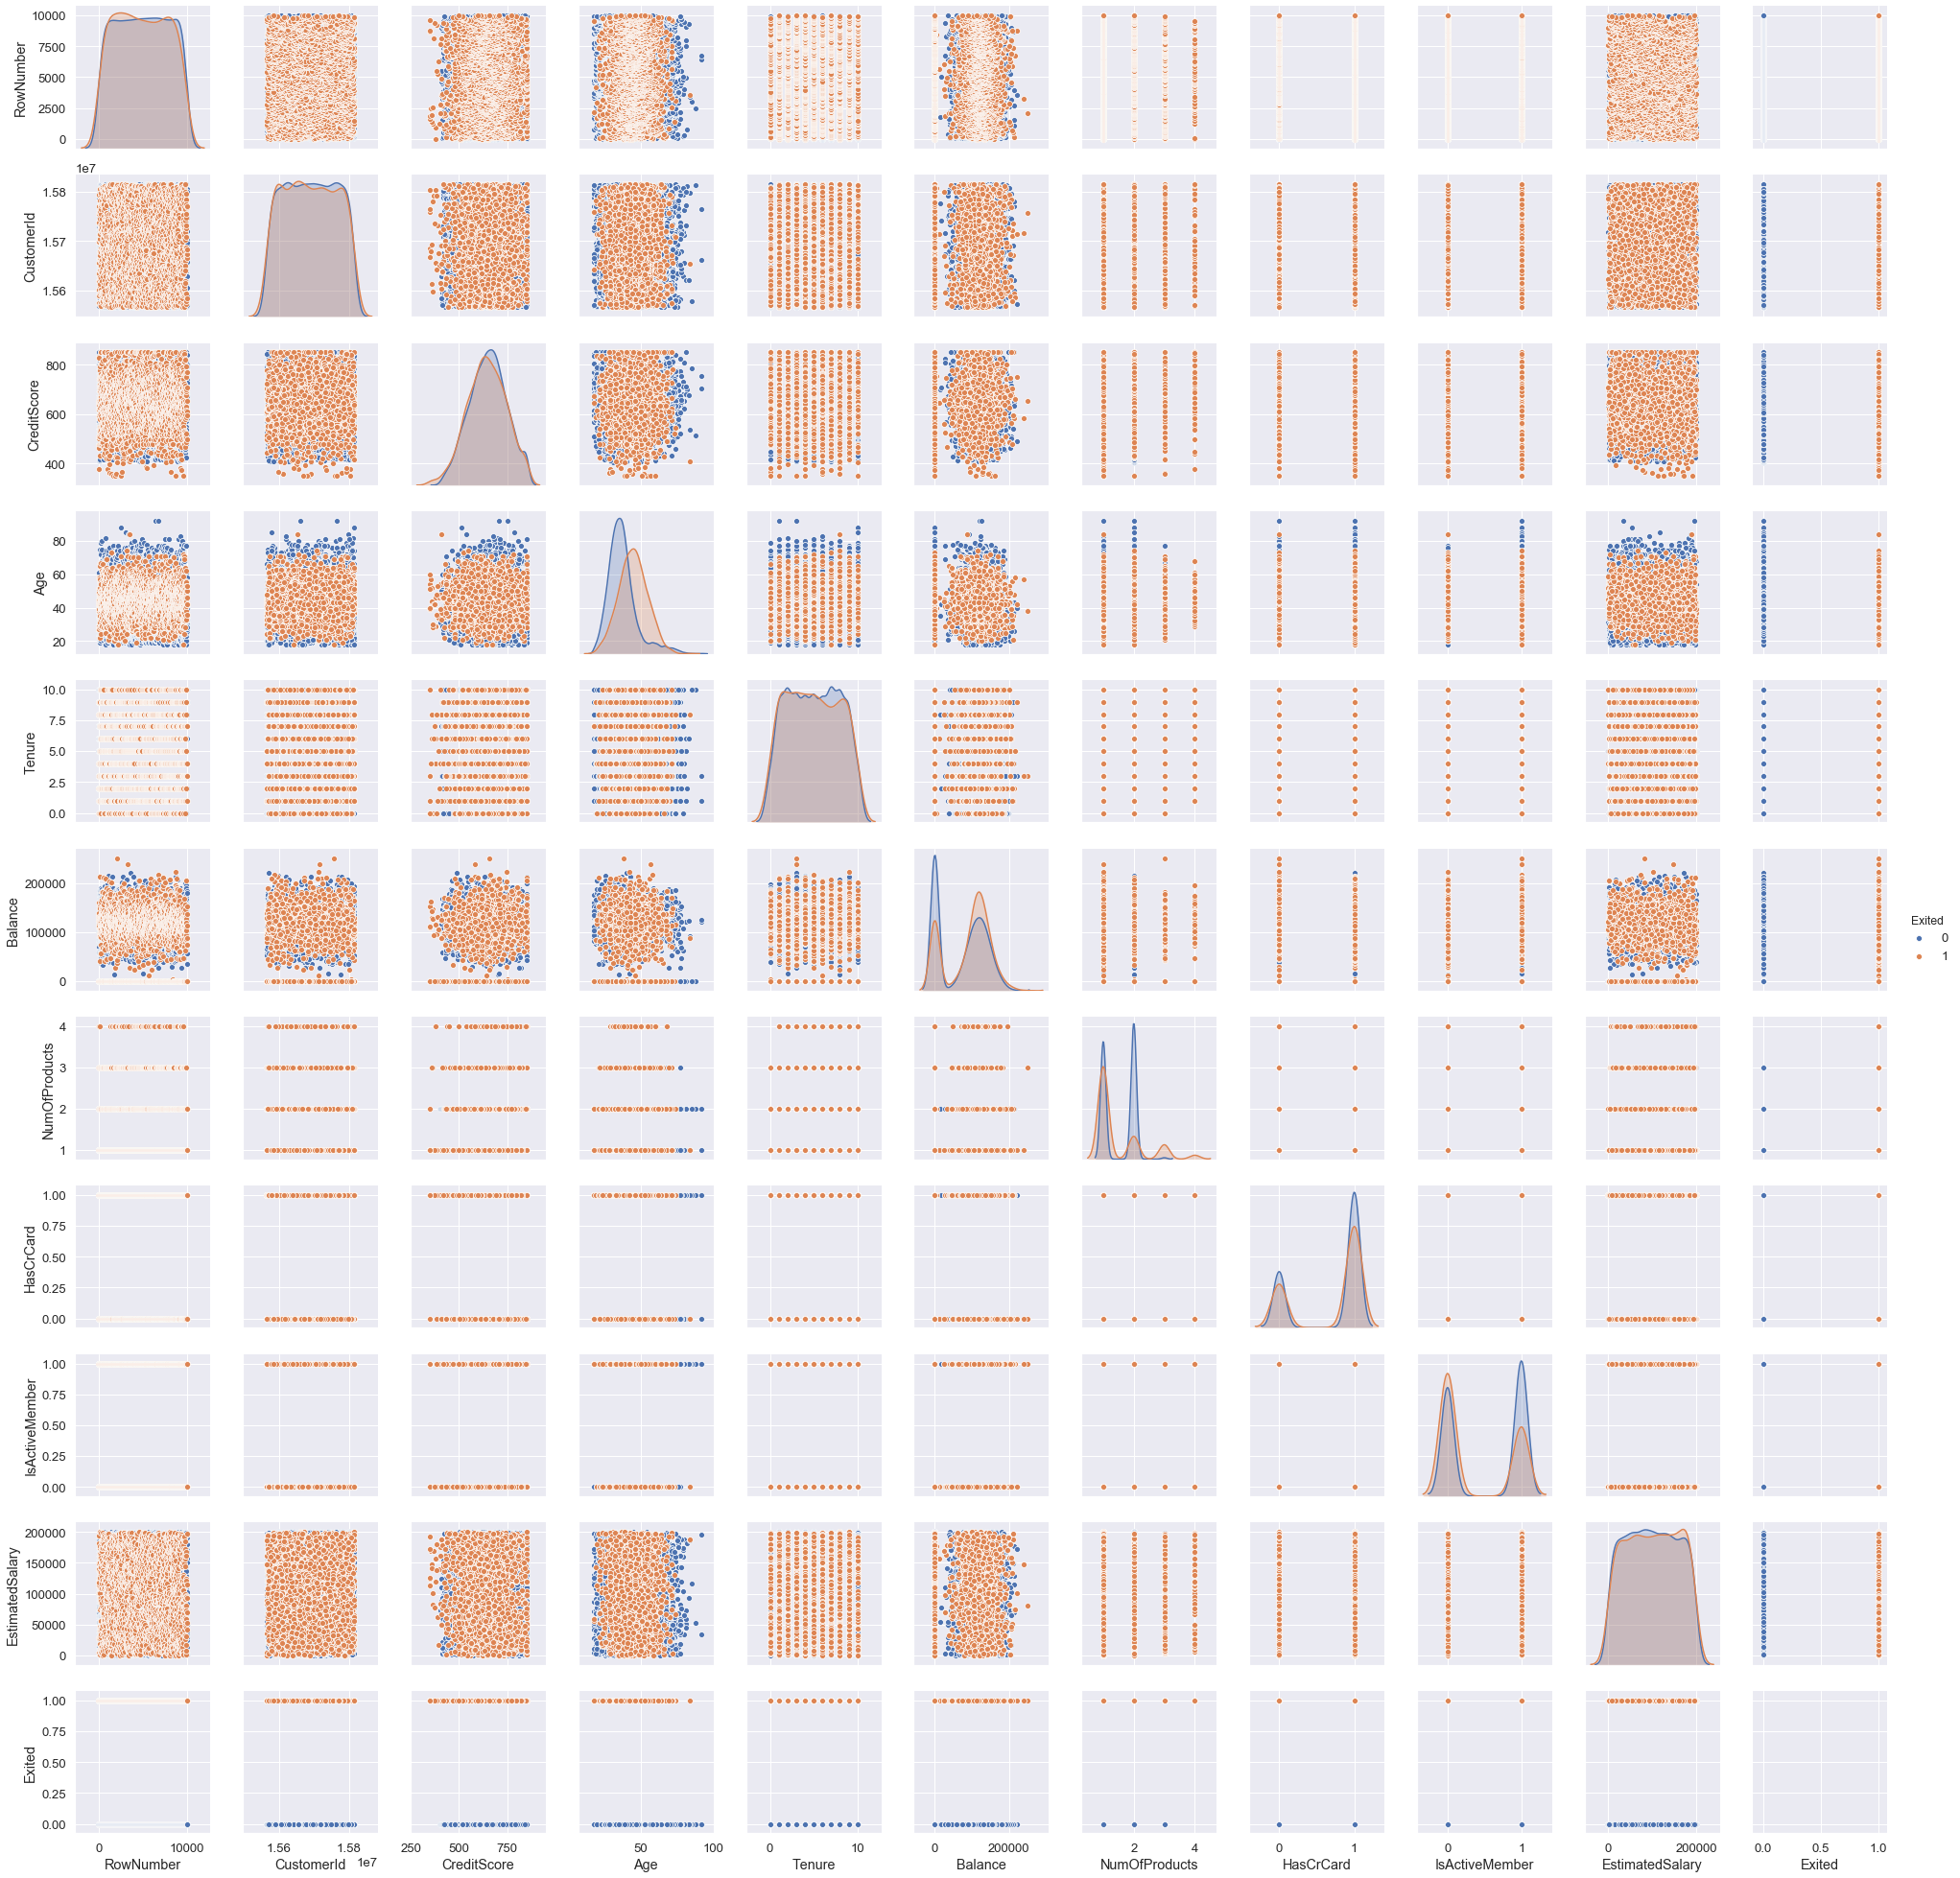

In [8]:
sns.set(font_scale=1.2)
sns.pairplot(dataset, diag_kind= 'kde', hue = 'Exited');

### Inferences
- There seems to be a bimodal distribution for most of the values
- This distribution does not seem to correspond to the classes of the Exited column
- There is almost no separation between the values for the two classes

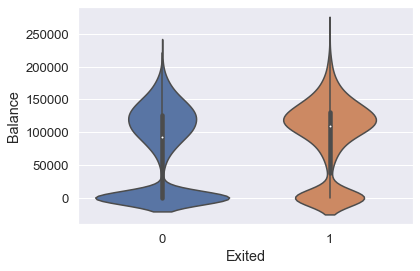

In [9]:
sns.violinplot(x = 'Exited', y = 'Balance', data = dataset)

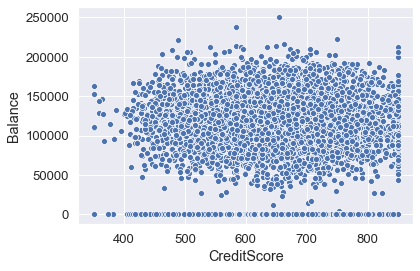

In [10]:
sns.scatterplot(x = 'CreditScore', y = 'Balance', data = dataset);

In [11]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [12]:
dataset = dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

### Inferences:

- The features which are unique to a customer are 'Surname' (almost all customers have unique surnames), 'CustomerId' and 'RowNumber'
- These rows are hence dropped

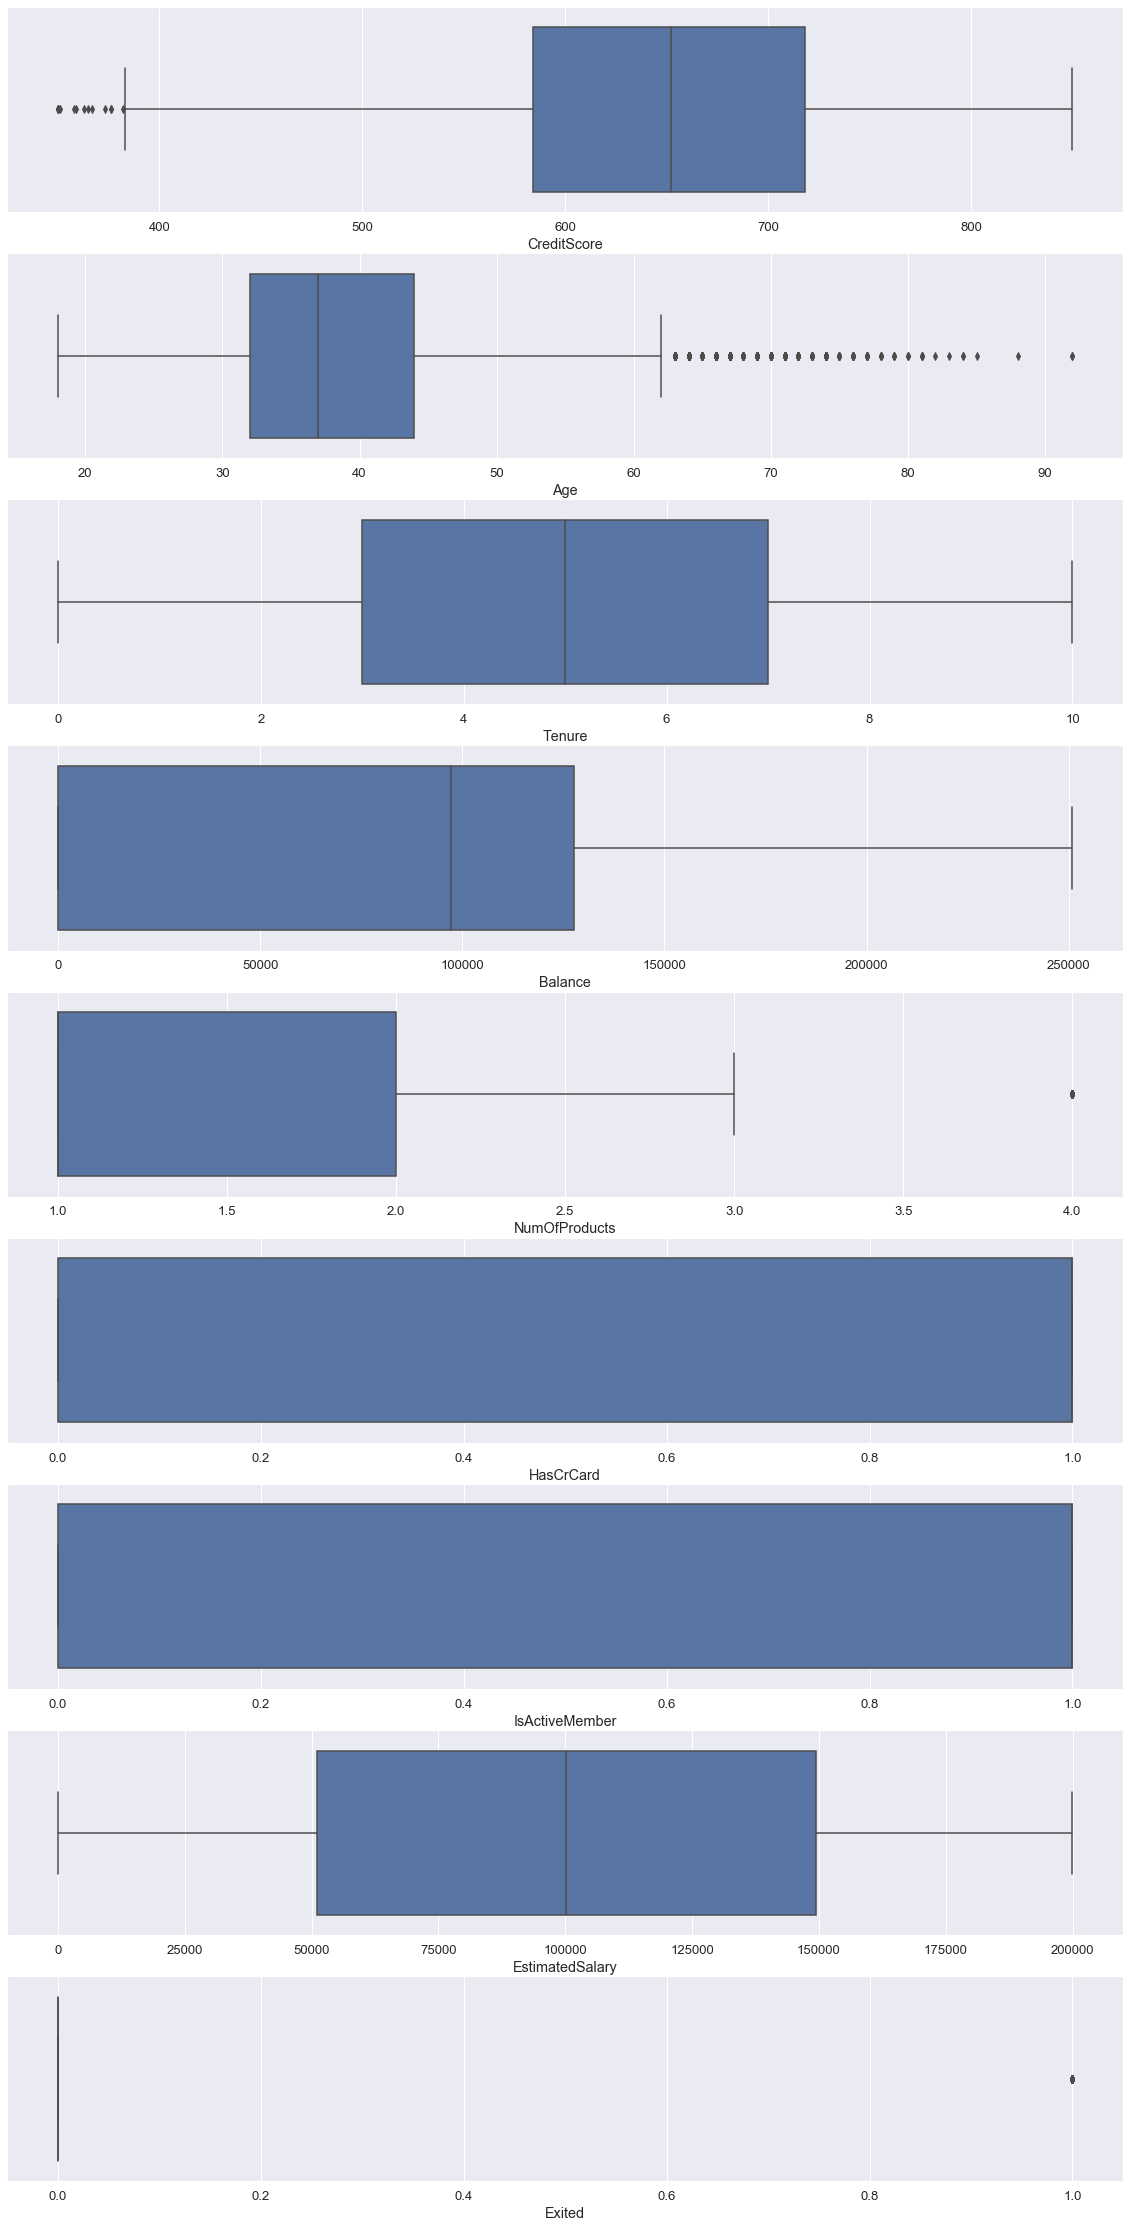

In [13]:
f, axes = plt.subplots(9,figsize=(20, 40), sharex=False)
j =0
for i in dataset.columns:
    
    if(dataset[i].dtypes != 'object'):
        sns.boxplot(dataset[i],ax=axes[j])
        j = j+1

### Inferences:
- We see that there are a lot of outliers in the dataset for some variables
- This is fine in the case of a banking data set as often outliers are impotant in a banking problem
- We also see that there are several zero balance customers in the dataset. However, their behavior is not distinguishable from those with high balances. Hence they will also be preserved in the analysis

In [14]:
dataset.shape

(10000, 11)

In [15]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Strategy

- Since tensorflow works with arrays, we turn the dataset into arrays
- We exclude the 'Exited' variable from the features array (X) and include 'Exited' in the target array (y)

In [16]:
X = dataset.iloc[:, :10].values
y = dataset.iloc[:, 10].values
print(X[:10,:], '\n')

print(y[:10])

[[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]
 [608 'Spain' 'Female' 41 1 83807.86 1 0 1 112542.58]
 [502 'France' 'Female' 42 8 159660.8 3 1 0 113931.57]
 [699 'France' 'Female' 39 1 0.0 2 0 0 93826.63]
 [850 'Spain' 'Female' 43 2 125510.82 1 1 1 79084.1]
 [645 'Spain' 'Male' 44 8 113755.78 2 1 0 149756.71]
 [822 'France' 'Male' 50 7 0.0 2 1 1 10062.8]
 [376 'Germany' 'Female' 29 4 115046.74 4 1 0 119346.88]
 [501 'France' 'Male' 44 4 142051.07 2 0 1 74940.5]
 [684 'France' 'Male' 27 2 134603.88 1 1 1 71725.73]] 

[1 0 1 0 0 1 0 1 0 0]


In [17]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Geography
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
# Gender
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
# Giving ordinal feature to our variables
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 0:]
print(X[:10,:], '\n')
print(y[:10])

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 6.1900000e+02 0.0000000e+00
  4.2000000e+01 2.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 6.0800000e+02 0.0000000e+00
  4.1000000e+01 1.0000000e+00 8.3807860e+04 1.0000000e+00 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 5.0200000e+02 0.0000000e+00
  4.2000000e+01 8.0000000e+00 1.5966080e+05 3.0000000e+00 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 6.9900000e+02 0.0000000e+00
  3.9000000e+01 1.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00
  0.0000000e+00 9.3826630e+04]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 8.5000000e+02 0.0000000e+00
  4.3000000e+01 2.0000000e+00 1.2551082e+05 1.0000000e+00 1.0000000e+00
  1.0000000e+00 7.9084100e+04]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 6.4500000e+02 1.0000000e+00
  4.4000000e+01 8.0000000e+00 1.1375578e+05 2.0000000

/Users/abhinandanchiney/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/abhinandanchiney/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


### Inferences:

- We one hot encode the categorical variables
- The reason why one hot encoder is used because these variables are nominal variables and not ordinal 
- The two columns that have been encoded are Geography and gender
- Since the output is binary we need not one hot encode it. 

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Feature Scaling (very important)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train.shape

(8000, 12)

In [20]:
X_test.shape

(2000, 12)

### Inferences:

- The data has been split in to training and testing sets 
- Teh split used is 80:20::training:testing

In [21]:
import keras
import sys
from keras.models import Sequential #to initialize NN
from keras.layers import Dense #used to create layers in NN

Using TensorFlow backend.


### Strategy

- We start by building the simpest ANN model - 1 neuron
- This model represents Logistic regression (linear model)
- We will gradually increase the complexity of this model to imporve accuracy

In [22]:
#Initialising the ANN - Defining as a sequence of layers or a Graph
classifier_1 = Sequential()


classifier_1.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 12))

classifier_1.compile(optimizer = 'adam',loss= 'binary_crossentropy',metrics=['accuracy'])

In [23]:
classifier_1.fit(X_train, y_train, batch_size = 10, epochs = 20 )

Epoch 1/20
8000/8000 [==============================] - 0s 61us/step - loss: 0.5812 - accuracy: 0.7734
Epoch 2/20
8000/8000 [==============================] - 0s 50us/step - loss: 0.4774 - accuracy: 0.8048
Epoch 3/20
8000/8000 [==============================] - 0s 53us/step - loss: 0.4453 - accuracy: 0.8058
Epoch 4/20
8000/8000 [==============================] - 0s 50us/step - loss: 0.4348 - accuracy: 0.8094
Epoch 5/20
8000/8000 [==============================] - 0s 49us/step - loss: 0.4314 - accuracy: 0.8091
Epoch 6/20
8000/8000 [==============================] - 0s 49us/step - loss: 0.4303 - accuracy: 0.8091
Epoch 7/20
8000/8000 [==============================] - 0s 49us/step - loss: 0.4300 - accuracy: 0.8098
Epoch 8/20
8000/8000 [==============================] - 0s 49us/step - loss: 0.4298 - accuracy: 0.8091
Epoch 9/20
8000/8000 [==============================] - 0s 49us/step - loss: 0.4297 - accuracy: 0.8089
Epoch 10/20
8000/8000 [==============================] - 0s 49us/step - l

In [24]:
#Predicting the Test set results
y_pred = classifier_1.predict(X_test)
#Threshold of 50%
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [25]:
#Making the COnfusion Matrix
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX")
print(cm_1)

CONFUSION MATRIX
[[1525   70]
 [ 308   97]]


In [88]:
accuracy_1 = (1525+97)/(2000)
print ("The accuracy is ",accuracy_1)

The accuracy is  0.811


### Inferences: 

The simplest logistic regression (ANN) model gives acuracy of around 0.80

### Strategy

- We now increase the non linearity of the ANN model 
- We use 2 neurons

In [27]:
#Initialising the ANN - Defining as a sequence of layers or a Graph
classifier_2_1 = Sequential()

#Input Layer
classifier_2_1.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12 ))



classifier_2_1.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier_2_1.compile(optimizer = 'adam',loss= 'binary_crossentropy',metrics=['accuracy'])

In [28]:
classifier_2_1.fit(X_train, y_train, batch_size = 10, epochs = 20, verbose=2) 

Epoch 1/20
 - 1s - loss: 0.5363 - accuracy: 0.7943
Epoch 2/20
 - 0s - loss: 0.4353 - accuracy: 0.7960
Epoch 3/20
 - 0s - loss: 0.4308 - accuracy: 0.7960
Epoch 4/20
 - 0s - loss: 0.4295 - accuracy: 0.7960
Epoch 5/20
 - 0s - loss: 0.4284 - accuracy: 0.7960
Epoch 6/20
 - 0s - loss: 0.4274 - accuracy: 0.7960
Epoch 7/20
 - 0s - loss: 0.4263 - accuracy: 0.7960
Epoch 8/20
 - 0s - loss: 0.4245 - accuracy: 0.7960
Epoch 9/20
 - 0s - loss: 0.4220 - accuracy: 0.8000
Epoch 10/20
 - 0s - loss: 0.4195 - accuracy: 0.8227
Epoch 11/20
 - 0s - loss: 0.4178 - accuracy: 0.8241
Epoch 12/20
 - 0s - loss: 0.4161 - accuracy: 0.8264
Epoch 13/20
 - 0s - loss: 0.4145 - accuracy: 0.8282
Epoch 14/20
 - 0s - loss: 0.4132 - accuracy: 0.8294
Epoch 15/20
 - 0s - loss: 0.4121 - accuracy: 0.8300
Epoch 16/20
 - 0s - loss: 0.4111 - accuracy: 0.8317
Epoch 17/20
 - 0s - loss: 0.4105 - accuracy: 0.8316
Epoch 18/20
 - 0s - loss: 0.4097 - accuracy: 0.8325
Epoch 19/20
 - 0s - loss: 0.4090 - accuracy: 0.8325
Epoch 20/20
 - 0s - l

In [29]:
#Predicting the Test set results
y_pred = classifier_2_1.predict(X_test)
#Threshold of 50%
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [30]:
#Making the COnfusion Matrix
from sklearn.metrics import confusion_matrix
cm_2_1 = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX")
print (cm_2_1)

CONFUSION MATRIX
[[1560   35]
 [ 291  114]]


In [87]:
accuracy_2_1 = (1560+114)/(2000)
print("The accuracy is ",accuracy_2_1)

The accuracy is  0.837


### Inferences
- The accuracy of this model has improved over the logistic linear model 
- Next we will add more non linearity by considering 3 neurons in the 1 layer

In [32]:
#Initialising the ANN - Defining as a sequence of layers or a Graph
classifier_3_1 = Sequential()

#Input Layer
classifier_3_1.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12 ))


classifier_3_1.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier_3_1.compile(optimizer = 'adam',loss= 'binary_crossentropy',metrics=['accuracy'])

In [33]:
classifier_3_1.fit(X_train, y_train, batch_size = 10, epochs = 20, verbose = 2 )

Epoch 1/20
 - 1s - loss: 0.5164 - accuracy: 0.7960
Epoch 2/20
 - 0s - loss: 0.4335 - accuracy: 0.7960
Epoch 3/20
 - 0s - loss: 0.4291 - accuracy: 0.7960
Epoch 4/20
 - 0s - loss: 0.4261 - accuracy: 0.7960
Epoch 5/20
 - 0s - loss: 0.4230 - accuracy: 0.7960
Epoch 6/20
 - 0s - loss: 0.4204 - accuracy: 0.8002
Epoch 7/20
 - 1s - loss: 0.4182 - accuracy: 0.8232
Epoch 8/20
 - 0s - loss: 0.4161 - accuracy: 0.8266
Epoch 9/20
 - 0s - loss: 0.4146 - accuracy: 0.8288
Epoch 10/20
 - 0s - loss: 0.4131 - accuracy: 0.8292
Epoch 11/20
 - 0s - loss: 0.4123 - accuracy: 0.8300
Epoch 12/20
 - 0s - loss: 0.4112 - accuracy: 0.8334
Epoch 13/20
 - 0s - loss: 0.4110 - accuracy: 0.8320
Epoch 14/20
 - 0s - loss: 0.4102 - accuracy: 0.8320
Epoch 15/20
 - 0s - loss: 0.4096 - accuracy: 0.8332
Epoch 16/20
 - 0s - loss: 0.4090 - accuracy: 0.8330
Epoch 17/20
 - 0s - loss: 0.4085 - accuracy: 0.8325
Epoch 18/20
 - 0s - loss: 0.4079 - accuracy: 0.8329
Epoch 19/20
 - 0s - loss: 0.4078 - accuracy: 0.8339
Epoch 20/20
 - 0s - l

In [34]:
#Predicting the Test set results
y_pred = classifier_3_1.predict(X_test)
#Threshold of 50%
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [35]:
#Making the COnfusion Matrix
from sklearn.metrics import confusion_matrix
cm_3_1 = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX")
print(cm_3_1)

CONFUSION MATRIX
[[1560   35]
 [ 287  118]]


In [86]:
accuracy_3_1 = (1560+118)/(2000)
print("The accuracy is ",accuracy_3_1)

The accuracy is  0.839


### Inferences:

- The accuracy of this model is better that the previous 2 simpler models
- We will now use 6 neurons to see the effect

In [37]:
#Initialising the ANN - Defining as a sequence of layers or a Graph
classifier_6_1 = Sequential()

#Input Layer
classifier_6_1.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12 ))



classifier_6_1.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier_6_1.compile(optimizer = 'adam',loss= 'binary_crossentropy',metrics=['accuracy'])

In [38]:
classifier_6_1.fit(X_train, y_train, batch_size = 10, epochs = 20, verbose = 2 )

Epoch 1/20
 - 1s - loss: 0.4986 - accuracy: 0.7959
Epoch 2/20
 - 0s - loss: 0.4219 - accuracy: 0.8046
Epoch 3/20
 - 0s - loss: 0.4059 - accuracy: 0.8102
Epoch 4/20
 - 0s - loss: 0.3919 - accuracy: 0.8154
Epoch 5/20
 - 0s - loss: 0.3808 - accuracy: 0.8180
Epoch 6/20
 - 0s - loss: 0.3724 - accuracy: 0.8380
Epoch 7/20
 - 0s - loss: 0.3661 - accuracy: 0.8501
Epoch 8/20
 - 0s - loss: 0.3615 - accuracy: 0.8541
Epoch 9/20
 - 0s - loss: 0.3578 - accuracy: 0.8583
Epoch 10/20
 - 0s - loss: 0.3553 - accuracy: 0.8571
Epoch 11/20
 - 0s - loss: 0.3537 - accuracy: 0.8579
Epoch 12/20
 - 0s - loss: 0.3520 - accuracy: 0.8589
Epoch 13/20
 - 0s - loss: 0.3506 - accuracy: 0.8580
Epoch 14/20
 - 0s - loss: 0.3499 - accuracy: 0.8590
Epoch 15/20
 - 0s - loss: 0.3490 - accuracy: 0.8589
Epoch 16/20
 - 0s - loss: 0.3485 - accuracy: 0.8597
Epoch 17/20
 - 0s - loss: 0.3477 - accuracy: 0.8606
Epoch 18/20
 - 0s - loss: 0.3474 - accuracy: 0.8599
Epoch 19/20
 - 0s - loss: 0.3468 - accuracy: 0.8611
Epoch 20/20
 - 0s - l

In [41]:
#Predicting the Test set results
y_pred = classifier_6_1.predict(X_test)
#Threshold of 50%
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

In [42]:
#Making the COnfusion Matrix
from sklearn.metrics import confusion_matrix
cm_6_1 = confusion_matrix(y_test, y_pred)
print("CONFUSION MATIX")
print(cm_6_1)

CONFUSION MATIX
[[1518   77]
 [ 202  203]]


In [85]:
accuracy_6_1 = (1518+203)/(2000)
accuracy_6_1

0.8605

### Inferences:

- We see that there is some improvement over the 3 neoron model with 6 neurons but no a lot
- Hence now we add another layer to the ANN model
- We use a 6-2-1 model now

In [45]:
#Initialising the ANN - Defining as a sequence of layers or a Graph
classifier_6_2 = Sequential()

#Input Layer
classifier_6_2.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12 ))

classifier_6_2.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu'))

classifier_6_2.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier_6_2.compile(optimizer = 'adam',loss= 'binary_crossentropy',metrics=['accuracy'])

In [47]:
classifier_6_2.fit(X_train, y_train, batch_size = 10, epochs = 50, verbose = 2 )

Epoch 1/50
 - 1s - loss: 0.4003 - accuracy: 0.8363
Epoch 2/50
 - 1s - loss: 0.4005 - accuracy: 0.8350
Epoch 3/50
 - 1s - loss: 0.4008 - accuracy: 0.8342
Epoch 4/50
 - 1s - loss: 0.4006 - accuracy: 0.8345
Epoch 5/50
 - 1s - loss: 0.4003 - accuracy: 0.8361
Epoch 6/50
 - 1s - loss: 0.4004 - accuracy: 0.8336
Epoch 7/50
 - 1s - loss: 0.4001 - accuracy: 0.8346
Epoch 8/50
 - 1s - loss: 0.4004 - accuracy: 0.8355
Epoch 9/50
 - 1s - loss: 0.4004 - accuracy: 0.8359
Epoch 10/50
 - 1s - loss: 0.4001 - accuracy: 0.8339
Epoch 11/50
 - 1s - loss: 0.4003 - accuracy: 0.8360
Epoch 12/50
 - 1s - loss: 0.4002 - accuracy: 0.8350
Epoch 13/50
 - 1s - loss: 0.3999 - accuracy: 0.8347
Epoch 14/50
 - 1s - loss: 0.4003 - accuracy: 0.8354
Epoch 15/50
 - 1s - loss: 0.4002 - accuracy: 0.8344
Epoch 16/50
 - 1s - loss: 0.4002 - accuracy: 0.8354
Epoch 17/50
 - 1s - loss: 0.4002 - accuracy: 0.8344
Epoch 18/50
 - 1s - loss: 0.3998 - accuracy: 0.8354
Epoch 19/50
 - 1s - loss: 0.3997 - accuracy: 0.8356
Epoch 20/50
 - 1s - l

In [48]:
#Predicting the Test set results
y_pred = classifier_6_2.predict(X_test)
#Threshold of 50%
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

In [49]:
#Making the COnfusion Matrix
from sklearn.metrics import confusion_matrix
cm_6_2 = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX")
print(cm_6_2)

CONFUSION MATRIX
[[1549   46]
 [ 273  132]]


In [84]:
accuracy_6_2 = (1549+132)/(2000)
print("The accuracy of the model is ", accuracy_6_2)

The accuracy of the model is  0.8405


### Inferences:

- The accuracy of the model improves a bit by adding the second layer
- We now make the second layer even more non-linear
- We will now model 6-6-1 

In [51]:
#Initialising the ANN - Defining as a sequence of layers or a Graph
classifier_6_6 = Sequential()

#Input Layer
classifier_6_6.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12 ))

classifier_6_6.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

classifier_6_6.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier_6_6.compile(optimizer = 'adam',loss= 'binary_crossentropy',metrics=['accuracy'])

In [52]:
classifier_6_6.fit(X_train, y_train, batch_size = 10, epochs = 20, verbose = 2 )

Epoch 1/20
 - 1s - loss: 0.4822 - accuracy: 0.7952
Epoch 2/20
 - 1s - loss: 0.4289 - accuracy: 0.7960
Epoch 3/20
 - 1s - loss: 0.4235 - accuracy: 0.7962
Epoch 4/20
 - 1s - loss: 0.4189 - accuracy: 0.8235
Epoch 5/20
 - 1s - loss: 0.4161 - accuracy: 0.8265
Epoch 6/20
 - 1s - loss: 0.4144 - accuracy: 0.8310
Epoch 7/20
 - 1s - loss: 0.4128 - accuracy: 0.8300
Epoch 8/20
 - 1s - loss: 0.4117 - accuracy: 0.8324
Epoch 9/20
 - 1s - loss: 0.4105 - accuracy: 0.8328
Epoch 10/20
 - 1s - loss: 0.4098 - accuracy: 0.8346
Epoch 11/20
 - 1s - loss: 0.4089 - accuracy: 0.8342
Epoch 12/20
 - 1s - loss: 0.4082 - accuracy: 0.8334
Epoch 13/20
 - 1s - loss: 0.4072 - accuracy: 0.8346
Epoch 14/20
 - 1s - loss: 0.4073 - accuracy: 0.8340
Epoch 15/20
 - 1s - loss: 0.4061 - accuracy: 0.8350
Epoch 16/20
 - 1s - loss: 0.4058 - accuracy: 0.8354
Epoch 17/20
 - 1s - loss: 0.4057 - accuracy: 0.8364
Epoch 18/20
 - 1s - loss: 0.4053 - accuracy: 0.8344
Epoch 19/20
 - 1s - loss: 0.4051 - accuracy: 0.8336
Epoch 20/20
 - 1s - l

In [53]:
#Predicting the Test set results
y_pred = classifier_6_6.predict(X_test)
#Threshold of 50%
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

In [54]:
#Making the COnfusion Matrix
from sklearn.metrics import confusion_matrix
cm_6_6 = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX")
print(cm_6_6)

CONFUSION MATRIX
[[1558   37]
 [ 278  127]]


In [83]:
accuracy_6_6 = (1558+127)/(2000)
accuracy_6_6

0.8425

### Inferences

- This gives reasonable accuracy
- We will test by adding one more layer 
- If no significant improvement is seen we will fix this model
- We now model 6-6-2-1

In [56]:
#Initialising the ANN - Defining as a sequence of layers or a Graph
classifier_6_6_2 = Sequential()

#Input Layer
classifier_6_6_2.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12 ))

classifier_6_6_2.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

classifier_6_6_2.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu'))

classifier_6_6_2.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier_6_6_2.compile(optimizer = 'adam',loss= 'binary_crossentropy',metrics=['accuracy'])

In [57]:
classifier_6_6_2.fit(X_train, y_train, batch_size = 10, epochs = 20, verbose = 2 )

Epoch 1/20
 - 1s - loss: 0.4907 - accuracy: 0.7960
Epoch 2/20
 - 1s - loss: 0.4292 - accuracy: 0.7960
Epoch 3/20
 - 1s - loss: 0.4242 - accuracy: 0.7960
Epoch 4/20
 - 1s - loss: 0.4196 - accuracy: 0.8124
Epoch 5/20
 - 1s - loss: 0.4169 - accuracy: 0.8264
Epoch 6/20
 - 1s - loss: 0.4141 - accuracy: 0.8289
Epoch 7/20
 - 1s - loss: 0.4136 - accuracy: 0.8314
Epoch 8/20
 - 1s - loss: 0.4115 - accuracy: 0.8316
Epoch 9/20
 - 1s - loss: 0.4103 - accuracy: 0.8319
Epoch 10/20
 - 1s - loss: 0.4097 - accuracy: 0.8339
Epoch 11/20
 - 1s - loss: 0.4084 - accuracy: 0.8335
Epoch 12/20
 - 1s - loss: 0.4080 - accuracy: 0.8345
Epoch 13/20
 - 1s - loss: 0.4070 - accuracy: 0.8344
Epoch 14/20
 - 1s - loss: 0.4063 - accuracy: 0.8339
Epoch 15/20
 - 1s - loss: 0.4061 - accuracy: 0.8346
Epoch 16/20
 - 1s - loss: 0.4050 - accuracy: 0.8346
Epoch 17/20
 - 1s - loss: 0.4050 - accuracy: 0.8354
Epoch 18/20
 - 1s - loss: 0.4044 - accuracy: 0.8353
Epoch 19/20
 - 1s - loss: 0.4045 - accuracy: 0.8347
Epoch 20/20
 - 1s - l

In [58]:
#Predicting the Test set results
y_pred = classifier_6_6_2.predict(X_test)
#Threshold of 50%
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

In [59]:
#Making the COnfusion Matrix
from sklearn.metrics import confusion_matrix
cm_6_6_2 = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX")

print(cm_6_6_2)

CONFUSION MATRIX
[[1550   45]
 [ 268  137]]


In [82]:
accuracy_6_6_2 = (1550+137)/(2000)
print("The accuracy of the mdoel is ",accuracy_6_6_2)

The accuracy of the mdoel is  0.8435


### Inferences

- Since there is no appreciable improvement in the accuracy by adding another layer we stick to 6-6-1 model 

In [89]:
results_dict = {'1-1': accuracy_1, '2-1':accuracy_2_1, '3-1':accuracy_3_1,'6-1':accuracy_6_1,'6-2-1':accuracy_6_2, '6-6-1': accuracy_6_6, '6-6-2-1':accuracy_6_6_2}

In [90]:
results = pd.DataFrame(results_dict, index = ['Accuracy'])

In [91]:
results

,1-1,2-1,3-1,6-1,6-2-1,6-6-1,6-6-2-1
Accuracy,0.811,0.837,0.839,0.8605,0.8405,0.8425,0.8435


### We now perform a crossvalidation study on the final chosen model (6-6-1)

In [64]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [65]:
#Import Keras library and packages
import keras
from keras.models import Sequential 
from keras.layers import Dense 

def build_classifier():
     classifier = Sequential()
     classifier.add(Dense(units = 6, kernel_initializer = 'uniform',     activation = 'relu', input_dim = 12 ))
     classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
     classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
     classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])
     return classifier
#fit our model to the traing data using KerasClassifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100 )

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)

In [66]:
mean = accuracies.mean()
variance = accuracies.std()

In [67]:
print("Mean accuracy", mean)
print("Standard deviation of accuracy", variance)

Mean accuracy 0.8406249940395355
Standard deviation of accuracy 0.021273882523283865


### We now perform a GRID SEARCH to find best hyperparameter

In [68]:
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
     classifier = Sequential()
     classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
     classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
     classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
     classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
     return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [100, 1000],'epochs': [100, 500], 'optimizer': ['adam',  'sgd','adadelta']}

grid_search = GridSearchCV(estimator = classifier,
param_grid = parameters, scoring = 'accuracy',cv = 10, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/500
8000/8000 [==============================] - 0s 17us/step - loss: 0.6626 - accuracy: 0.7916
Epoch 2/500
8000/8000 [==============================] - 0s 9us/step - loss: 0.6147 - accuracy: 0.7960
Epoch 3/500
8000/8000 [==============================] - 0s 7us/step - loss: 0.5824 - accuracy: 0.7960
Epoch 4/500
8000/8000 [==============================] - 0s 7us/step - loss: 0.5602 - accuracy: 0.7960
Epoch 5/500
8000/8000 [==============================] - 0s 7us/step - loss: 0.5449 - accuracy: 0.7960
Epoch 6/500
8000/8000 [==============================] - 0s 8us/step - loss: 0.5342 - accuracy: 0.7960
Epoch 7/500
8000/8000 [==============================] - 0s 8us/step - loss: 0.5266 - accuracy: 0.7960
Epoch 8/500
8000/8000 [==============================] - 0s 7us/step - loss: 0.5211 - accuracy: 0.7960
Epoch 9/500
8000/8000 [==============================] - 0s 7us/step - loss: 0.5172 - accuracy: 0.7960
Epoch 10/500
8000/8000 [==============================] - 0s 7us/step - 

8000/8000 [==============================] - 0s 7us/step - loss: 0.5059 - accuracy: 0.7960
Epoch 80/500
8000/8000 [==============================] - 0s 7us/step - loss: 0.5059 - accuracy: 0.7960
Epoch 81/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.5059 - accuracy: 0.7960
Epoch 82/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.5059 - accuracy: 0.7960
Epoch 83/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.5059 - accuracy: 0.7960
Epoch 84/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.5059 - accuracy: 0.7960
Epoch 85/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.5059 - accuracy: 0.7960
Epoch 86/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.5059 - accuracy: 0.7960
Epoch 87/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.5059 - accuracy: 0.7960
Epoch 88/500
8000/8000 [==============================] - 0s 6us/step - loss:

8000/8000 [==============================] - 0s 6us/step - loss: 0.5057 - accuracy: 0.7960
Epoch 158/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.5057 - accuracy: 0.7960
Epoch 159/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.5057 - accuracy: 0.7960
Epoch 160/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.5057 - accuracy: 0.7960
Epoch 161/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.5057 - accuracy: 0.7960
Epoch 162/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.5057 - accuracy: 0.7960
Epoch 163/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.5057 - accuracy: 0.7960
Epoch 164/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.5057 - accuracy: 0.7960
Epoch 165/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.5056 - accuracy: 0.7960
Epoch 166/500
8000/8000 [==============================] - 0s 6us/ste

8000/8000 [==============================] - 0s 12us/step - loss: 0.4979 - accuracy: 0.7960
Epoch 236/500
8000/8000 [==============================] - 0s 11us/step - loss: 0.4972 - accuracy: 0.7960
Epoch 237/500
8000/8000 [==============================] - 0s 8us/step - loss: 0.4966 - accuracy: 0.7960
Epoch 238/500
8000/8000 [==============================] - 0s 7us/step - loss: 0.4959 - accuracy: 0.7960
Epoch 239/500
8000/8000 [==============================] - 0s 7us/step - loss: 0.4951 - accuracy: 0.7960
Epoch 240/500
8000/8000 [==============================] - 0s 7us/step - loss: 0.4943 - accuracy: 0.7960
Epoch 241/500
8000/8000 [==============================] - 0s 7us/step - loss: 0.4934 - accuracy: 0.7960
Epoch 242/500
8000/8000 [==============================] - 0s 7us/step - loss: 0.4924 - accuracy: 0.7960
Epoch 243/500
8000/8000 [==============================] - 0s 8us/step - loss: 0.4913 - accuracy: 0.7960
Epoch 244/500
8000/8000 [==============================] - 0s 7us/s

8000/8000 [==============================] - 0s 6us/step - loss: 0.4270 - accuracy: 0.7960
Epoch 314/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.4269 - accuracy: 0.7960
Epoch 315/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.4268 - accuracy: 0.7960
Epoch 316/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.4267 - accuracy: 0.7960
Epoch 317/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.4266 - accuracy: 0.7960
Epoch 318/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.4266 - accuracy: 0.7960
Epoch 319/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.4265 - accuracy: 0.7960
Epoch 320/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.4264 - accuracy: 0.7960
Epoch 321/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.4263 - accuracy: 0.7960
Epoch 322/500
8000/8000 [==============================] - 0s 6us/ste

8000/8000 [==============================] - 0s 6us/step - loss: 0.4090 - accuracy: 0.8167
Epoch 392/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.4078 - accuracy: 0.8181
Epoch 393/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.4066 - accuracy: 0.8194
Epoch 394/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.4052 - accuracy: 0.8207
Epoch 395/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.4038 - accuracy: 0.8217
Epoch 396/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.4023 - accuracy: 0.8221
Epoch 397/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.4008 - accuracy: 0.8239
Epoch 398/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.3992 - accuracy: 0.8254
Epoch 399/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.3976 - accuracy: 0.8270
Epoch 400/500
8000/8000 [==============================] - 0s 6us/ste

8000/8000 [==============================] - 0s 6us/step - loss: 0.3501 - accuracy: 0.8599
Epoch 470/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.3498 - accuracy: 0.8602
Epoch 471/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.3497 - accuracy: 0.8596
Epoch 472/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.3494 - accuracy: 0.8608
Epoch 473/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.3493 - accuracy: 0.8609
Epoch 474/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.3491 - accuracy: 0.8608
Epoch 475/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.3489 - accuracy: 0.8610
Epoch 476/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.3487 - accuracy: 0.8616
Epoch 477/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.3487 - accuracy: 0.8604
Epoch 478/500
8000/8000 [==============================] - 0s 6us/ste

In [69]:
best_accuracy

0.860625

In [70]:
best_parameters

{'batch_size': 100, 'epochs': 500, 'optimizer': 'sgd'}

### We now build and test the model with the best parameters

In [71]:
classifier_final = Sequential()
classifier_final.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
classifier_final.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier_final.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier_final.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier_final.fit(X_train, y_train, batch_size = 1000, epochs = 500, verbose = 2  )

Epoch 1/500
 - 0s - loss: 0.6913 - accuracy: 0.7936
Epoch 2/500
 - 0s - loss: 0.6868 - accuracy: 0.7960
Epoch 3/500
 - 0s - loss: 0.6803 - accuracy: 0.7960
Epoch 4/500
 - 0s - loss: 0.6684 - accuracy: 0.7960
Epoch 5/500
 - 0s - loss: 0.6437 - accuracy: 0.7960
Epoch 6/500
 - 0s - loss: 0.5925 - accuracy: 0.7960
Epoch 7/500
 - 0s - loss: 0.5133 - accuracy: 0.7960
Epoch 8/500
 - 0s - loss: 0.4640 - accuracy: 0.7960
Epoch 9/500
 - 0s - loss: 0.4494 - accuracy: 0.7960
Epoch 10/500
 - 0s - loss: 0.4429 - accuracy: 0.7960
Epoch 11/500
 - 0s - loss: 0.4391 - accuracy: 0.7960
Epoch 12/500
 - 0s - loss: 0.4361 - accuracy: 0.7960
Epoch 13/500
 - 0s - loss: 0.4342 - accuracy: 0.7960
Epoch 14/500
 - 0s - loss: 0.4323 - accuracy: 0.7960
Epoch 15/500
 - 0s - loss: 0.4313 - accuracy: 0.7960
Epoch 16/500
 - 0s - loss: 0.4298 - accuracy: 0.7960
Epoch 17/500
 - 0s - loss: 0.4289 - accuracy: 0.7960
Epoch 18/500
 - 0s - loss: 0.4276 - accuracy: 0.7960
Epoch 19/500
 - 0s - loss: 0.4265 - accuracy: 0.7960
Ep

Epoch 155/500
 - 0s - loss: 0.4032 - accuracy: 0.8353
Epoch 156/500
 - 0s - loss: 0.4029 - accuracy: 0.8356
Epoch 157/500
 - 0s - loss: 0.4029 - accuracy: 0.8350
Epoch 158/500
 - 0s - loss: 0.4028 - accuracy: 0.8356
Epoch 159/500
 - 0s - loss: 0.4027 - accuracy: 0.8354
Epoch 160/500
 - 0s - loss: 0.4026 - accuracy: 0.8359
Epoch 161/500
 - 0s - loss: 0.4026 - accuracy: 0.8353
Epoch 162/500
 - 0s - loss: 0.4024 - accuracy: 0.8356
Epoch 163/500
 - 0s - loss: 0.4023 - accuracy: 0.8356
Epoch 164/500
 - 0s - loss: 0.4023 - accuracy: 0.8356
Epoch 165/500
 - 0s - loss: 0.4022 - accuracy: 0.8361
Epoch 166/500
 - 0s - loss: 0.4019 - accuracy: 0.8357
Epoch 167/500
 - 0s - loss: 0.4020 - accuracy: 0.8357
Epoch 168/500
 - 0s - loss: 0.4018 - accuracy: 0.8359
Epoch 169/500
 - 0s - loss: 0.4018 - accuracy: 0.8366
Epoch 170/500
 - 0s - loss: 0.4017 - accuracy: 0.8360
Epoch 171/500
 - 0s - loss: 0.4015 - accuracy: 0.8359
Epoch 172/500
 - 0s - loss: 0.4015 - accuracy: 0.8360
Epoch 173/500
 - 0s - loss: 

Epoch 307/500
 - 0s - loss: 0.3929 - accuracy: 0.8385
Epoch 308/500
 - 0s - loss: 0.3929 - accuracy: 0.8386
Epoch 309/500
 - 0s - loss: 0.3927 - accuracy: 0.8384
Epoch 310/500
 - 0s - loss: 0.3927 - accuracy: 0.8393
Epoch 311/500
 - 0s - loss: 0.3928 - accuracy: 0.8388
Epoch 312/500
 - 0s - loss: 0.3927 - accuracy: 0.8388
Epoch 313/500
 - 0s - loss: 0.3927 - accuracy: 0.8391
Epoch 314/500
 - 0s - loss: 0.3930 - accuracy: 0.8388
Epoch 315/500
 - 0s - loss: 0.3926 - accuracy: 0.8378
Epoch 316/500
 - 0s - loss: 0.3926 - accuracy: 0.8381
Epoch 317/500
 - 0s - loss: 0.3926 - accuracy: 0.8386
Epoch 318/500
 - 0s - loss: 0.3926 - accuracy: 0.8396
Epoch 319/500
 - 0s - loss: 0.3927 - accuracy: 0.8389
Epoch 320/500
 - 0s - loss: 0.3926 - accuracy: 0.8382
Epoch 321/500
 - 0s - loss: 0.3925 - accuracy: 0.8386
Epoch 322/500
 - 0s - loss: 0.3925 - accuracy: 0.8388
Epoch 323/500
 - 0s - loss: 0.3923 - accuracy: 0.8376
Epoch 324/500
 - 0s - loss: 0.3925 - accuracy: 0.8390
Epoch 325/500
 - 0s - loss: 

Epoch 459/500
 - 0s - loss: 0.3911 - accuracy: 0.8384
Epoch 460/500
 - 0s - loss: 0.3912 - accuracy: 0.8388
Epoch 461/500
 - 0s - loss: 0.3913 - accuracy: 0.8382
Epoch 462/500
 - 0s - loss: 0.3911 - accuracy: 0.8382
Epoch 463/500
 - 0s - loss: 0.3912 - accuracy: 0.8389
Epoch 464/500
 - 0s - loss: 0.3911 - accuracy: 0.8395
Epoch 465/500
 - 0s - loss: 0.3910 - accuracy: 0.8382
Epoch 466/500
 - 0s - loss: 0.3912 - accuracy: 0.8375
Epoch 467/500
 - 0s - loss: 0.3910 - accuracy: 0.8384
Epoch 468/500
 - 0s - loss: 0.3912 - accuracy: 0.8382
Epoch 469/500
 - 0s - loss: 0.3911 - accuracy: 0.8382
Epoch 470/500
 - 0s - loss: 0.3912 - accuracy: 0.8391
Epoch 471/500
 - 0s - loss: 0.3910 - accuracy: 0.8378
Epoch 472/500
 - 0s - loss: 0.3912 - accuracy: 0.8382
Epoch 473/500
 - 0s - loss: 0.3910 - accuracy: 0.8375
Epoch 474/500
 - 0s - loss: 0.3910 - accuracy: 0.8396
Epoch 475/500
 - 0s - loss: 0.3911 - accuracy: 0.8391
Epoch 476/500
 - 0s - loss: 0.3910 - accuracy: 0.8381
Epoch 477/500
 - 0s - loss: 

In [72]:
#Predicting the Test set results
y_pred = classifier_final.predict(X_test)
#Threshold of 50%
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [73]:
cm_final = confusion_matrix(y_test, y_pred)
print("CONFISION MATRIX")
print(cm_final)

CONFISION MATRIX
[[1541   54]
 [ 257  148]]


In [81]:
accuracy_final = (1541+148)/(2000)
print("Final Accuracy ",accuracy_final)

Final Accuracy  0.8445


### Before deploying the final model for production we will train the model on teh whole data set which it has not seen due to the training process. Since training is now done the production model will be trained on the whole dataset.

In [75]:
x_f = np.append(X_train,X_test, axis = 0)
y_f = np.append(y_train, y_test, axis = 0)

In [76]:
classifier_final.fit(x_f, y_f, batch_size = 1000, epochs = 500, verbose = 2  )

Epoch 1/500
 - 0s - loss: 0.3907 - accuracy: 0.8395
Epoch 2/500
 - 0s - loss: 0.3905 - accuracy: 0.8386
Epoch 3/500
 - 0s - loss: 0.3903 - accuracy: 0.8394
Epoch 4/500
 - 0s - loss: 0.3903 - accuracy: 0.8385
Epoch 5/500
 - 0s - loss: 0.3904 - accuracy: 0.8386
Epoch 6/500
 - 0s - loss: 0.3903 - accuracy: 0.8391
Epoch 7/500
 - 0s - loss: 0.3902 - accuracy: 0.8394
Epoch 8/500
 - 0s - loss: 0.3902 - accuracy: 0.8396
Epoch 9/500
 - 0s - loss: 0.3901 - accuracy: 0.8389
Epoch 10/500
 - 0s - loss: 0.3901 - accuracy: 0.8396
Epoch 11/500
 - 0s - loss: 0.3901 - accuracy: 0.8399
Epoch 12/500
 - 0s - loss: 0.3899 - accuracy: 0.8402
Epoch 13/500
 - 0s - loss: 0.3900 - accuracy: 0.8398
Epoch 14/500
 - 0s - loss: 0.3900 - accuracy: 0.8392
Epoch 15/500
 - 0s - loss: 0.3900 - accuracy: 0.8391
Epoch 16/500
 - 0s - loss: 0.3900 - accuracy: 0.8403
Epoch 17/500
 - 0s - loss: 0.3900 - accuracy: 0.8394
Epoch 18/500
 - 0s - loss: 0.3901 - accuracy: 0.8401
Epoch 19/500
 - 0s - loss: 0.3898 - accuracy: 0.8395
Ep

Epoch 155/500
 - 0s - loss: 0.3883 - accuracy: 0.8412
Epoch 156/500
 - 0s - loss: 0.3883 - accuracy: 0.8411
Epoch 157/500
 - 0s - loss: 0.3882 - accuracy: 0.8415
Epoch 158/500
 - 0s - loss: 0.3883 - accuracy: 0.8414
Epoch 159/500
 - 0s - loss: 0.3882 - accuracy: 0.8414
Epoch 160/500
 - 0s - loss: 0.3882 - accuracy: 0.8408
Epoch 161/500
 - 0s - loss: 0.3882 - accuracy: 0.8416
Epoch 162/500
 - 0s - loss: 0.3880 - accuracy: 0.8416
Epoch 163/500
 - 0s - loss: 0.3882 - accuracy: 0.8410
Epoch 164/500
 - 0s - loss: 0.3882 - accuracy: 0.8413
Epoch 165/500
 - 0s - loss: 0.3880 - accuracy: 0.8412
Epoch 166/500
 - 0s - loss: 0.3883 - accuracy: 0.8417
Epoch 167/500
 - 0s - loss: 0.3881 - accuracy: 0.8417
Epoch 168/500
 - 0s - loss: 0.3880 - accuracy: 0.8410
Epoch 169/500
 - 0s - loss: 0.3881 - accuracy: 0.8414
Epoch 170/500
 - 0s - loss: 0.3881 - accuracy: 0.8414
Epoch 171/500
 - 0s - loss: 0.3881 - accuracy: 0.8413
Epoch 172/500
 - 0s - loss: 0.3880 - accuracy: 0.8415
Epoch 173/500
 - 0s - loss: 

Epoch 307/500
 - 0s - loss: 0.3453 - accuracy: 0.8616
Epoch 308/500
 - 0s - loss: 0.3450 - accuracy: 0.8627
Epoch 309/500
 - 0s - loss: 0.3448 - accuracy: 0.8625
Epoch 310/500
 - 0s - loss: 0.3447 - accuracy: 0.8614
Epoch 311/500
 - 0s - loss: 0.3445 - accuracy: 0.8629
Epoch 312/500
 - 0s - loss: 0.3446 - accuracy: 0.8620
Epoch 313/500
 - 0s - loss: 0.3444 - accuracy: 0.8622
Epoch 314/500
 - 0s - loss: 0.3443 - accuracy: 0.8632
Epoch 315/500
 - 0s - loss: 0.3440 - accuracy: 0.8626
Epoch 316/500
 - 0s - loss: 0.3439 - accuracy: 0.8630
Epoch 317/500
 - 0s - loss: 0.3437 - accuracy: 0.8632
Epoch 318/500
 - 0s - loss: 0.3436 - accuracy: 0.8634
Epoch 319/500
 - 0s - loss: 0.3437 - accuracy: 0.8633
Epoch 320/500
 - 0s - loss: 0.3439 - accuracy: 0.8636
Epoch 321/500
 - 0s - loss: 0.3434 - accuracy: 0.8641
Epoch 322/500
 - 0s - loss: 0.3432 - accuracy: 0.8634
Epoch 323/500
 - 0s - loss: 0.3431 - accuracy: 0.8639
Epoch 324/500
 - 0s - loss: 0.3432 - accuracy: 0.8634
Epoch 325/500
 - 0s - loss: 

Epoch 459/500
 - 0s - loss: 0.3364 - accuracy: 0.8655
Epoch 460/500
 - 0s - loss: 0.3365 - accuracy: 0.8655
Epoch 461/500
 - 0s - loss: 0.3361 - accuracy: 0.8662
Epoch 462/500
 - 0s - loss: 0.3359 - accuracy: 0.8655
Epoch 463/500
 - 0s - loss: 0.3363 - accuracy: 0.8646
Epoch 464/500
 - 0s - loss: 0.3361 - accuracy: 0.8648
Epoch 465/500
 - 0s - loss: 0.3359 - accuracy: 0.8655
Epoch 466/500
 - 0s - loss: 0.3362 - accuracy: 0.8658
Epoch 467/500
 - 0s - loss: 0.3358 - accuracy: 0.8648
Epoch 468/500
 - 0s - loss: 0.3358 - accuracy: 0.8651
Epoch 469/500
 - 0s - loss: 0.3360 - accuracy: 0.8652
Epoch 470/500
 - 0s - loss: 0.3360 - accuracy: 0.8656
Epoch 471/500
 - 0s - loss: 0.3357 - accuracy: 0.8645
Epoch 472/500
 - 0s - loss: 0.3357 - accuracy: 0.8653
Epoch 473/500
 - 0s - loss: 0.3356 - accuracy: 0.8647
Epoch 474/500
 - 0s - loss: 0.3358 - accuracy: 0.8641
Epoch 475/500
 - 0s - loss: 0.3361 - accuracy: 0.8649
Epoch 476/500
 - 0s - loss: 0.3357 - accuracy: 0.8652
Epoch 477/500
 - 0s - loss: 

In [77]:
#Predicting the Test set results
y_pred = classifier_final.predict(x_f)
#Threshold of 50%
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [78]:
cm_prod = confusion_matrix(y_f, y_pred)
print("CONFUSION MATRIX")

print(cm_prod)

CONFUSION MATRIX
[[7629  334]
 [1018 1019]]


In [80]:
accuracy_prod = (7629+1019)/(10000)
print("Final production model accuracy is ",accuracy_prod)

Final production model accuracy is  0.8648
